# CHAPTER 4 
# NumPy Basics: Arrays and Vectorized Computation

在数值计算领域，说Numpy是python最重要的包也不为过。在numpy中有下面这些东西：

- ndarray, 一个有效的多维数组，能提供以数组为导向的快速数值计算和灵活的广播功能（broadcasting）

- 便利的数学函数

- 用于读取/写入(reading/writing)数据到磁盘的便利工具

- 线性代数，随机数生成，傅里叶变换能力

- 可以用C API来写C，C++，或FORTRAN

通过学习理解numpy中数组和数组导向计算，能帮我们理解pandas之类的工具。

# 4.1 The NumPy ndarray: A Multidimensional Array Object（ndarray: 多维数组对象）

N-dimensional array object（n维数组对象）, or ndarray，这是numpy的关键特征。先来尝试一下，生成一个随机数组：

In [1]:
import numpy as np

In [2]:
# Generate some random data
data = np.random.randn(2, 3)

In [3]:
data

array([[-0.35512366, -0.63779545,  0.14137933],
       [ 0.36642056,  0.30898139, -0.87040292]])

进行一些数学运算：

In [4]:
data * 10

array([[-3.55123655, -6.37795453,  1.41379333],
       [ 3.66420556,  3.0898139 , -8.70402916]])

In [5]:
data + data

array([[-0.71024731, -1.27559091,  0.28275867],
       [ 0.73284111,  0.61796278, -1.74080583]])

每一个数组都有一个shape，来表示维度大小。而dtype，用来表示data type：

In [6]:
data.shape

(2, 3)

In [7]:
data.dtype

dtype('float64')

# 1 Greating ndarrays (创建n维数组)

最简单的方法使用array函数，输入一个序列即可，比如list：

In [8]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

嵌套序列能被转换为多维数组：

In [10]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

因为data2是一个list of lists, 所以arr2维度为2。我们能用ndim和shape属性来确认一下：

In [11]:
arr2.ndim

2

In [12]:
arr2.shape

(2, 4)

除非主动声明，否则np.array会自动给data搭配适合的类型，并保存在dtype里：

In [13]:
arr1.dtype

dtype('float64')

In [14]:
arr2.dtype

dtype('int64')

除了np.array，还有一些其他函数能创建数组。比如zeros,ones,另外还可以在一个tuple里指定shape：

In [15]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [16]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [18]:
np.empty((2, 3, 2))

array([[[  0.00000000e+000,   0.00000000e+000],
        [  2.16538378e-314,   2.16514681e-314],
        [  2.16511832e-314,   2.16072529e-314]],

       [[  0.00000000e+000,   0.00000000e+000],
        [  2.14037397e-314,   6.36598737e-311],
        [  0.00000000e+000,   0.00000000e+000]]])

np.empty并不能保证返回所有是0的数组，某些情况下，会返回为初始化的垃圾数值，比如上面。

arange是一个数组版的python range函数：

In [19]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

这里是一些创建数组的函数：

![](../MarkdownPhotos/chp04/屏幕快照 2017-10-24 下午1.04.36.png)

![](../MarkdownPhotos/chp04/屏幕快照 2017-10-24 下午1.04.36_cn.png)

# 2 Data Types for ndarrays

dtype保存数据的类型：

In [20]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [21]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [22]:
arr1.dtype

dtype('float64')

In [23]:
arr2.dtype

dtype('int32')

dtype才是numpy能灵活处理其他外界数据的原因。

类型表格：
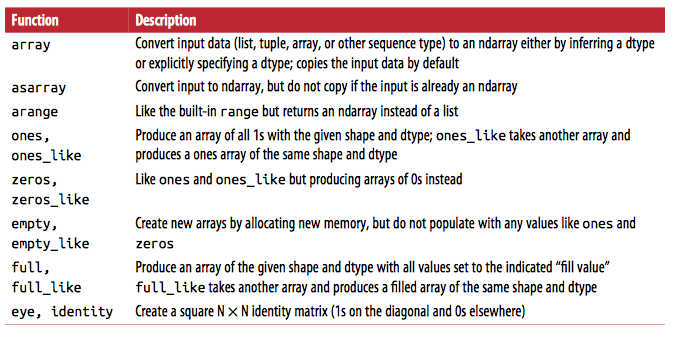
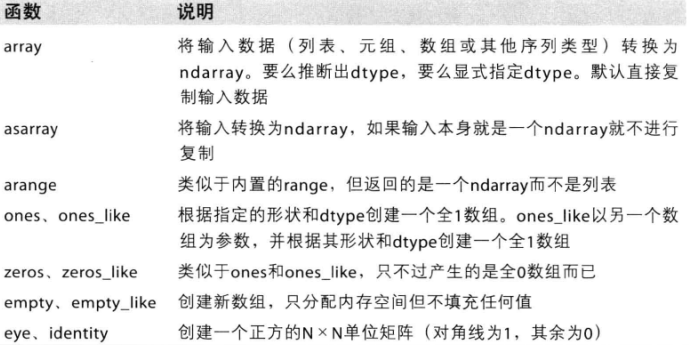
可以用astype来转换类型：

In [26]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [27]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

上面是把int变为float。如果是把float变为int，小数点后的部分会被丢弃：

In [28]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([  3.7,  -1.2,  -2.6,   0.5,  12.9,  10.1])

In [29]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

还可以用astype把string里的数字变为实际的数字：

In [31]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], 
      dtype='|S4')

In [32]:
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

要十分注意`numpy.string_`类型，这种类型的长度是固定的，所以可能会直接截取部分输入而不给警告。

如果转换（casting）失败的话，会给出一个ValueError提示。

可以用其他数组的dtype直接来制定类型：

In [34]:
int_array = np.arange(10)

calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)

In [35]:
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

还可以利用类型的缩写，比如u4就代表unit32：

In [40]:
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

记住，astype总是会返回一个新的数组

# 3 Arithmetic with NumPy Arrays（数组计算）

数组之所以重要，是因为不用写for循环就能表达很多操作，这种特性叫做vectorization(向量化)。任何两个大小相等的数组之间的运算，都是element-wise（点对点）：

In [41]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [42]:
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [43]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [44]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

element-wise 我翻译为点对点，就是指两个数组的运算，在同一位置的元素间才会进行运算。

这种算数操作如果涉及标量（scalar）的话，会涉及到数组的每一个元素：


In [45]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [46]:
arr ** 0.5

array([[ 1.        ,  1.41421356,  1.73205081],
       [ 2.        ,  2.23606798,  2.44948974]])

两个数组的比较会产生布尔数组：

In [48]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [49]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

# 4 Basic Indexing and Slicing（基本的索引和切片）

一维的我们之前已经在list部分用过了，没什么不同：

In [51]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
arr[5]

5

In [53]:
arr[5:8]

array([5, 6, 7])

In [54]:
arr[5:8] = 12

In [55]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

这里把12赋给`arr[5:8]`，其实用到了broadcasted（我觉得应该翻译为广式转变）。这里有一个比较重要的概念需要区分，python内建的list与numpy的array有个明显的区别，这里array的切片后的结果只是一个views（视图），用来代表原有array对应的元素，而不是创建了一个新的array。但list里的切片是产生了一个新的list：

In [56]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

如果我们改变arr_slice的值，会反映在原始的数组arr上：

In [58]:
arr_slice[1] = 12345

In [59]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

`[:]`这个赋值给所有元素：

In [61]:
arr_slice[:] = 64

In [62]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

之所以这样设计是出于性能和内存的考虑，毕竟如果总是复制数据的话，会很影响运算时间。当然如果想要复制，可以使用copy()方法，比如`arr[5:8].copy()`

在一个二维数组里，单一的索引指代的是一维的数组：

In [63]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

有两种方式可以访问单一元素：

In [64]:
arr2d[0][2]

3

In [65]:
arr2d[0, 2]

3

我们可以把下图中的axis0看做row（行），把axis1看做column（列）：

![](../MarkdownPhotos/chp04/屏幕快照 2017-10-24 下午2.08.18.png)

对于多维数组，如果省略后面的索引，返回的将是一个低纬度的多维数组。比如下面一个2 x 2 x 3数组：

In [66]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0]是一个2x3数组：

In [67]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

标量和数组都能赋给arr3d[0]:

In [68]:
old_values = arr3d[0].copy()

arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [69]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

`arr3d[1, 0]`会给你一个(1, 0)的一维数组：

In [70]:
arr3d[1, 0]

array([7, 8, 9])

上面的一步等于下面的两步：

In [71]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [72]:
x[0]

array([7, 8, 9])

一定要牢记这些切片后返回的数组都是views

## Indexing with slices（用切片索引）

一维的话和python里的list没什么差别：

In [75]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [76]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维的话，数组的切片有点不同：

In [77]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

可以看到，切片是沿着axis 0（行）来处理的。所以，数组中的切片，是要沿着设置的axis来处理的。我们可以把arr2d[:2]理解为“选中arr2d的前两行”。

当然，给定多个索引后，也可以使用复数切片：

In [79]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [81]:
arr2d[:2, 1:] # 前两行，第二列之后

array([[2, 3],
       [5, 6]])

记住，选中的是array view。通过混合整数和切片，能做低维切片。比如，我们选中第二行的前两列：

In [82]:
arr2d[1, :2]

array([4, 5])

选中第三列的前两行：

In [83]:
arr2d[:2, 2]

array([3, 6])

冒号表示提取整个axis（轴）：

In [84]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

看图示有助于理解：
![](../MarkdownPhotos/chp04/屏幕快照 2017-10-24 下午2.41.52.png)

赋值也很方便：

In [85]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

# 5 Boolean Indexing (布尔索引)

假设我们的数组数据里有一些重复。这里我们用numpy.random里的randn函数来随机生成一些离散数据：

In [87]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [93]:
data = np.random.randn(7, 4)
data

array([[ 0.02584271, -1.53529621,  0.73143988, -0.34086189],
       [ 0.40864782,  0.53476799,  1.09620596,  0.4846564 ],
       [ 1.95024076, -0.37291038, -0.40424703,  0.30297059],
       [-0.48632936,  0.63817756, -0.40792716, -1.48037389],
       [-0.81976335, -1.10162466, -0.59823212, -0.10926744],
       [-0.5212113 ,  0.29449179,  2.0568032 ,  2.00515735],
       [-2.36066876, -0.3294302 , -0.24464646, -0.81432884]])

假设每一个name对应data数组中的一行，我们想要选中name为'Bob'的所有行。就像四则运算，用比较运算符（==）：

In [94]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

然后用这个布尔数组当做索引：

In [95]:
data[names == 'Bob']

array([[ 0.02584271, -1.53529621,  0.73143988, -0.34086189],
       [-0.48632936,  0.63817756, -0.40792716, -1.48037389]])

注意：布尔数组和data数组的长度要一样。

我们可以选中names=='Bob'的行，然后索引列：

In [96]:
data[names == 'Bob', 2:]

array([[ 0.73143988, -0.34086189],
       [-0.40792716, -1.48037389]])

In [97]:
data[names == 'Bob', 3]

array([-0.34086189, -1.48037389])

选中除了'Bob'外的所有行，可以用`!=`或者`~`：

In [98]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [99]:
data[~(names == 'Bob')]

array([[ 0.40864782,  0.53476799,  1.09620596,  0.4846564 ],
       [ 1.95024076, -0.37291038, -0.40424703,  0.30297059],
       [-0.81976335, -1.10162466, -0.59823212, -0.10926744],
       [-0.5212113 ,  0.29449179,  2.0568032 ,  2.00515735],
       [-2.36066876, -0.3294302 , -0.24464646, -0.81432884]])

当想要反转一个条件时，用`~`操作符很方便：

In [100]:
cond = names == 'Bob'

In [101]:
data[~cond]

array([[ 0.40864782,  0.53476799,  1.09620596,  0.4846564 ],
       [ 1.95024076, -0.37291038, -0.40424703,  0.30297059],
       [-0.81976335, -1.10162466, -0.59823212, -0.10926744],
       [-0.5212113 ,  0.29449179,  2.0568032 ,  2.00515735],
       [-2.36066876, -0.3294302 , -0.24464646, -0.81432884]])

选中2个或3个名字，组合多个布尔条件，用布尔运算符&，|，另外python中的关键词and和or不管用：

In [104]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [105]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [106]:
data[mask]

array([[ 0.02584271, -1.53529621,  0.73143988, -0.34086189],
       [ 1.95024076, -0.37291038, -0.40424703,  0.30297059],
       [-0.48632936,  0.63817756, -0.40792716, -1.48037389],
       [-0.81976335, -1.10162466, -0.59823212, -0.10926744]])

用布尔索引总是会返回一份新创建的数据，原本的数据不会被改变。

更改值的方式也很直觉。比如我们想让所有负数变为0：

In [107]:
data[data < 0] = 0

In [108]:
data

array([[ 0.02584271,  0.        ,  0.73143988,  0.        ],
       [ 0.40864782,  0.53476799,  1.09620596,  0.4846564 ],
       [ 1.95024076,  0.        ,  0.        ,  0.30297059],
       [ 0.        ,  0.63817756,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.29449179,  2.0568032 ,  2.00515735],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

用一维的布尔数组也能更改所有行或列：

In [111]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='<U4')

In [109]:
data[names != 'Joe'] = 7

In [110]:
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.40864782,  0.53476799,  1.09620596,  0.4846564 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.29449179,  2.0568032 ,  2.00515735],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

# 6 Fancy Indexing(花式索引)

通过整数数组来索引。假设我们有一个8 x 4的数组：

In [112]:
arr = np.empty((8, 4))

In [113]:
for i in range(8):
    arr[i] = i

In [114]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

想要按一定顺序选出几行，可以用一个整数list或整数ndarray来指定顺序：

In [115]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

用符号来从后选择row：

In [116]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

用多维索引数组，能选出由一维数组中的元素，通过在每个tuple中指定索引：

In [118]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [119]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

可以看到`[ 4, 23, 29, 10]`分别对应`(1, 0), (5, 3), (7, 1), (2, 2)`。不论数组有多少维，fancy indexing的结果总是一维。

对于长方形区域，有下面的方法来截取：

In [120]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

上面的意思是，先从arr中选出[1, 5, 7, 2]这四行：

    array([[ 4,  5,  6,  7],
           [20, 21, 22, 23],
           [28, 29, 30, 31],
           [ 8,  9, 10, 11]])
           
然后[:, [0, 3, 1, 2]]表示选中所有行，但是列的顺序要按0,3,1,2来排。于是得到：

    array([[ 4,  7,  5,  6],
           [20, 23, 21, 22],
           [28, 31, 29, 30],
           [ 8, 11,  9, 10]])
           
要记住，fancy indexing和切片不同，得到的是一个新的array。

# 7 Transposing Arrays and Swapping Axes（数组转置和轴交换）

转置也是返回一个view，而不是新建一个数组。有两种方式，一个是transpose方法，一个是T属性：

In [122]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [123]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，这个功能很常用，计算矩阵乘法的时候，用np.dot:

In [130]:
arr = np.arange(8).reshape((4, 2))
print(arr.T)
print(arr)

[[0 2 4 6]
 [1 3 5 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [129]:
np.dot(arr.T, arr)

array([[56, 68],
       [68, 84]])

上面的例子是 (2x4) x (4x2) = (2x2)。得到的结果是2x2维，就是普通的矩阵乘法。

对于多维数组，transpose会接受由轴数字组成的tuple，来交换轴：

In [131]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [132]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，secode axis(1)被设为第一个，first axis(0)第二个，最后的axis没边。

使用`.T`来转置swapping axes(交换轴)的一个特殊情况。ndarray有方法叫做swapaxes, 这个方法取两个axis值，并交换这两个轴：

In [133]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [135]:
arr.swapaxes(1, 2) # 直交换second axis和last axis

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回view，不生成新的data。

# 4.2 Universal Functions: Fast Element-Wise Array Functions（通用函数：快速点对点数组函数）

universal function, 或 ufunc, 是用来在ndarray中实现element-wise操作的。

可以认为这个ufunc可以把一些简单的函数做快速的向量化封装，输入是一个以上的标量，输出也是一个以上的标量。

很多ufuncs都是点对点的变换，像sqrt或exp：

In [3]:
import numpy as np
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [5]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

这些函数叫做一元通用函数（unary ufuncs）。其他一些函数，比如add或maximum，需要两个数组（binary ufuncs）,并返回一个数组作为结果：

In [7]:
x = np.random.randn(8)
y = np.random.randn(8)
x

array([ 0.18373557, -1.82728347, -0.11149882, -1.34286776, -1.09016986,
        1.63308   ,  1.05205535, -0.32746706])

In [8]:
y

array([-0.42410809,  1.89603273, -1.13649816, -0.98559379, -0.16827718,
        0.52828569,  1.57543351,  1.50045399])

In [9]:
np.maximum(x, y)

array([ 0.18373557,  1.89603273, -0.11149882, -0.98559379, -0.16827718,
        1.63308   ,  1.57543351,  1.50045399])

这里mamimum点对点的比较x和y中的元素。

尽管不常见，但ufunc也能返回多个数组。例如modf，这是一个向量版的divmod（python内建函数），modf会返回小数部分和整数部分：

>本函数是实现a除以b，然后返回商与余数的元组。如果两个参数a,b都是整数，那么会采用整数除法，结果相当于（a//b, a % b)。如果a或b是浮点数，相当于（math.floor(a/b), a%b)。


In [10]:
arr = np.random.randn(7) * 5
arr

array([ 1.51538382, -0.75054846,  0.02863286,  8.74026861, -3.44529124,
       -9.18401768, -0.68469611])

In [11]:
remainder, whole_part = np.modf(arr)
remainder

array([ 0.51538382, -0.75054846,  0.02863286,  0.74026861, -0.44529124,
       -0.18401768, -0.68469611])

In [12]:
whole_part

array([ 1., -0.,  0.,  8., -3., -9., -0.])

ufunc能接受一个可选参数作为输出，这样可以直接更改原有的数组：

In [13]:
arr

array([ 1.51538382, -0.75054846,  0.02863286,  8.74026861, -3.44529124,
       -9.18401768, -0.68469611])

In [14]:
np.sqrt(arr) # 没有改变原有的arr

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


array([ 1.23100927,         nan,  0.16921248,  2.95639453,         nan,
               nan,         nan])

In [15]:
np.sqrt(arr, arr) # 改变了原有的arr

/Users/xu/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


array([ 1.23100927,         nan,  0.16921248,  2.95639453,         nan,
               nan,         nan])

In [16]:
arr

array([ 1.23100927,         nan,  0.16921248,  2.95639453,         nan,
               nan,         nan])

一些一元通用函数：

![](../MarkdownPhotos/chp04/屏幕快照 2017-10-25 下午1.19.41.png)



一些二元通用函数：
![](../MarkdownPhotos/chp04/屏幕快照 2017-10-25 下午1.21.08.png)

![](../MarkdownPhotos/chp04/屏幕快照 2017-10-25 下午1.21.42.png)



向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数`sqrt(x^2 + y^2)`。`np.meshgrid`函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合：

In [7]:
import numpy as np

在进行书中的内容之前，先举个例子说明meshgrid的效果。meshgrid函数用两个坐标轴上的点在平面上画网格。用法：

- `[X,Y]=meshgrid(x,y)`

- `[X,Y]=meshgrid(x)`与`[X,Y]=meshgrid(x,x)`是等同的

- `[X,Y,Z]=meshgrid(x,y,z)`生成三维数组，可用来计算三变量的函数和绘制三维立体图

这里，主要以`[X,Y]=meshgrid(x,y)`为例，来对该函数进行介绍。

`[X,Y] = meshgrid(x,y)` 将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。

假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm （注意不是mn）。

In [18]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [19]:
y

array([ 0. ,  0.5,  1. ])

In [20]:
X

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

In [21]:
Y

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

可以看到X和Y的shape都是3x5，用图的话更好理解：

[](../MarkdownPhotos/chp04/v2-a7f1c996c371d1167a0fb7b5273c6d01_r.jpg)

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/jaa76.jpg)


把X和Y画出来后，就可以看到网格了：



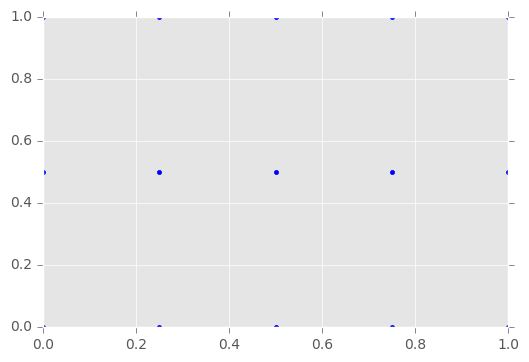

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

可以用zip得到网格平面上坐标点的数据：

In [24]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

好了，下面继续进入书中的内容

In [3]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [25]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

这里我们用matplotlib把图画出来：

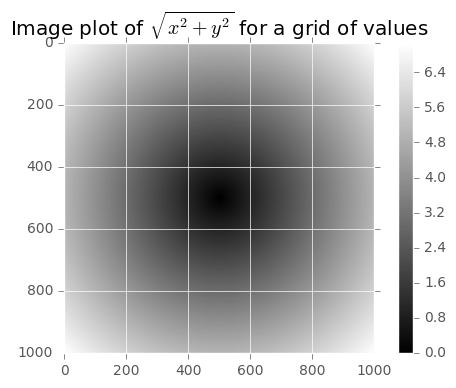

In [27]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

`numpy.where`函数是一个向量版的三相表达式，`x if condition else y`。假设我们有一个布尔数组和两个数组：

In [28]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设如果cond中为true，我们去xarr中对应的值，否则就取yarr中的值。列表表达式的话会这么写：

In [29]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

这么做的话会有很多问题。首先，对于很大的数组，会比较慢。第二，对于多维数组不起作用。但`np.where`能让我们写得更简洁：

In [30]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

`np.where`中第二个和第三个参数不用必须是数组。where在数据分析中一个典型的用法是基于一个数组，产生一个新的数组值。假设我们有一个随机数字生成的矩阵，我们想要把所有的正数变为2，所有的负数变为-2。用where的话会非常简单：

In [31]:
arr = np.random.randn(4, 4)
arr

array([[ 2.18194474,  0.15001978, -0.77191684,  0.18716397],
       [ 1.2083149 , -0.22911585,  1.30880201,  0.14197253],
       [ 0.65639111, -1.28394185,  0.65706167,  1.14277598],
       [-0.32639966, -0.26880881, -0.10225964,  0.4739671 ]])

In [32]:
arr > 0

array([[ True,  True, False,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True],
       [False, False, False,  True]], dtype=bool)

In [33]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2, -2,  2,  2],
       [ 2, -2,  2,  2],
       [-2, -2, -2,  2]])

我们可以结合标量和数组。比如只把整数变为2，其他仍未原来的数字：

In [34]:
np.where(arr > 0, 2, arr) # set only positive value to 2

array([[ 2.        ,  2.        , -0.77191684,  2.        ],
       [ 2.        , -0.22911585,  2.        ,  2.        ],
       [ 2.        , -1.28394185,  2.        ,  2.        ],
       [-0.32639966, -0.26880881, -0.10225964,  2.        ]])

# 2 Mathematical and Statistical Methods (数学和统计方法)

一些能计算统计值的数学函数能基于整个数组，或者沿着一个axis（轴）。可以使用aggregations(often called reductions，汇总，或被叫做降维)，比如sum, mean, and std(标准差).

下面是一些aggregate statistics（汇总统计）：


In [35]:
arr = np.random.randn(5, 4)
arr

array([[-1.53575656, -1.39268394, -1.02284353, -1.03165049],
       [ 0.53301867,  0.50258973, -0.49389656,  0.24610963],
       [ 0.95377174, -1.57268184,  0.42969986,  1.22912566],
       [ 0.73686692, -2.82328155,  0.48018497, -1.38046692],
       [ 0.94164808,  0.19599722, -0.88779738, -0.87556277]])

In [36]:
arr.mean()

-0.33838045197794597

In [37]:
np.mean(arr)

-0.33838045197794597

In [38]:
arr.sum()

-6.767609039558919

mean, sum这样的函数能接受axis作为参数来计算统计数字，返回的结果维度更少：

In [39]:
arr.mean(axis=1)

array([-1.24573363,  0.19695537,  0.25997886, -0.74667415, -0.15642871])

In [40]:
arr.sum(axis=0)

array([ 1.62954886, -5.09006038, -1.49465263, -1.81244489])

这里`arr.mean(1)`表示，compute mean acros the columns(计算各列之间的平均值)。`arr.sum(0)`表示，compute sum down the rows(计算各行总和)。

其他一些方法，像cumsum和cumprod不做汇总，而是产生一个中间结果的数组：

In [41]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

上面的计算是一个累加的结果，`0+1=1，1+2=3，3+3=6`以此类推。

In [44]:
np.cumsum?

对于多维数组，accumulation functions（累积函数）比如cumsum，返回的是同样大小的数组，但是部分聚合会沿着指示的轴向较低维度进行切片：

In [45]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [46]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [47]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

这里有一些基本的统计计算方法：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/9mzrp.png)

# 3 Methods for Boolean Arrays（布尔数组的方法）

sum是用来计算布尔数组中有多少个true的：

In [48]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

46

有两个其他方法，any和all，对于布尔数组特别有用。any检测数组中只要有一个ture返回就是true，而all检测数组中都是true才会返回true。

In [49]:
bools = np.array([False, False, True, False])

In [50]:
bools.any()

True

In [51]:
bools.all()

False

# 4 Sorting（排序）

numpy中也有sort方法：

In [53]:
np.random.randn?
# 返回符合正态分布的数值

In [54]:
arr = np.random.randn(6)
arr

array([ 1.93663555, -1.29810982,  0.83366006,  0.51674613,  2.32879117,
        1.07342758])

In [55]:
arr.sort()

In [56]:
arr

array([-1.29810982,  0.51674613,  0.83366006,  1.07342758,  1.93663555,
        2.32879117])

如果是多维数组，还可以按axis来排序：

In [57]:
arr = np.random.randn(5, 3)
arr

array([[-0.76658562, -1.00222899,  0.39039437],
       [ 0.23100317, -1.0581081 ,  1.69177329],
       [ 1.0239365 ,  0.84698669, -0.97911915],
       [ 0.76255951,  0.27828523,  0.41807172],
       [ 0.40792019, -1.19514714, -1.41666804]])

In [58]:
arr.sort(1)

In [59]:
arr

array([[-1.00222899, -0.76658562,  0.39039437],
       [-1.0581081 ,  0.23100317,  1.69177329],
       [-0.97911915,  0.84698669,  1.0239365 ],
       [ 0.27828523,  0.41807172,  0.76255951],
       [-1.41666804, -1.19514714,  0.40792019]])

上面是直接调用数组的sort方法，会改变原有数组的顺序。但如果使用`np.sort()`函数的话，会生成一个新的排序后的结果。

一个计算分位数的快捷方法是先给数组排序，然后选择某个排名的值：

In [60]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [61]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6908607973872243

# 5 Unique and Other Set Logic (单一性和其他集合逻辑)

Numpy也有一些基本的集合操作用于一维数组。`np.unique`，能返回排好序且不重复的值：

In [62]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [63]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [64]:
np.unique(ints)

array([1, 2, 3, 4])

如果用纯python代码来实现的话，要这么写：

In [65]:
sorted(set(names))

['Bob', 'Joe', 'Will']

`np.in1d`, 测试一个数组的值是否在另一个数组里，返回一个布尔数组：

In [66]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [67]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

这里是一些数组的集合操作：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/du91n.png)

Numpy能从磁盘直接存储和加载数据，不论是文本格式还是二进制模式。这里我们只考虑Numpy的二进制模式，因为大多数用户更喜欢用pandas或其他工具来加载text或tabular数据。

np.save和np.load。数组会以未压缩的原始二进制模式被保存，后缀为.npy:

In [3]:
import numpy as np

arr = np.arange(10)
np.save('../examples/some_array', arr)

即使保存的时候没有加后缀，也会被自动加上。可以用np.load来加载数组：

In [6]:
np.load('../examples/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

用np.savez能保存多个数组，还可以指定数组对应的关键字，不过是未压缩的npz格式：

In [7]:
np.savez('../examples/array_archive.npz', a=arr, b=arr)

加载.npz文件的时候，得到一个dict object：

In [9]:
arch = np.load('../examples/array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

可以用np.savez_compressed来压缩文件：

In [10]:
np.savez_compressed('../examples/array_compressed.npz', a=arr, b=arr)

在MATLAB里，`*` 代表矩阵乘法。但是在numpy里，`*`表示element-wise prodct。要想做到矩阵乘法，要用多函数dot:

In [2]:
import numpy as np

In [5]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [6]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [7]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [8]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

`x.dot(y)`等同于`np.dot(x, y)`:

In [9]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

一个二维数组和一个一维数组的矩阵乘法，得到一个一维数组：

In [10]:
np.dot(x, np.ones(3))  
# 这里应该是用狂了boradcasting，x中的每一行与[1, 1, 1]点对点乘积后求和

array([  6.,  15.])

`@`作为一个中缀计算符（鬼知道这是什么东西），也能实现矩阵乘法：

In [13]:
x @ np.ones(3)

array([  6.,  15.])

`np.linalg`能用来做矩阵分解，以及比如转置和求秩之类的事情：

In [14]:
from numpy.linalg import inv, qr

In [31]:
# X = np.round(np.random.randn(5, 5), 3) # 这里我们用np.round控制小数点后的位数，看起来更舒服一些
X = np.random.randn(5, 5)
X

array([[ 0.0761557 , -0.34138565, -0.56325926,  1.7854    ,  1.23440008],
       [ 1.46787829,  1.73130465,  1.03519282,  1.11137573, -0.05928319],
       [-0.95508009, -1.35350494, -1.43415583, -0.28499706,  0.32739284],
       [ 0.83307271,  1.89349058,  0.94116452,  0.32347353,  0.22236912],
       [-1.20661273,  0.4531822 ,  0.47635565, -1.69312137, -0.34497803]])

In [41]:
mat = X.T.dot(X)
np.round(mat, 2)

array([[ 5.22,  4.84,  3.06,  4.35,  0.3 ],
       [ 4.84,  8.74,  5.92,  1.55, -0.7 ],
       [ 3.06,  5.92,  4.56,  0.05, -1.18],
       [ 4.35,  1.55,  0.05,  7.48,  2.7 ],
       [ 0.3 , -0.7 , -1.18,  2.7 ,  1.8 ]])

In [40]:
np.round(inv(mat), 2)

array([[ 12.14,  -6.15,   3.85, -11.22,  14.95],
       [ -6.15,   4.85,  -4.47,   5.7 ,  -8.57],
       [  3.85,  -4.47,   5.23,  -3.78,   6.71],
       [-11.22,   5.7 ,  -3.78,  10.77, -14.55],
       [ 14.95,  -8.57,   6.71, -14.55,  20.95]])

In [35]:
np.round(mat.dot(inv(mat)), 2)

array([[ 1.,  0.,  0.,  0., -0.],
       [-0.,  1.,  0., -0., -0.],
       [ 0., -0.,  1., -0.,  0.],
       [-0.,  0.,  0.,  1.,  0.],
       [ 0.,  0., -0.,  0.,  1.]])

In [36]:
q, r = qr(mat)

In [38]:
np.round(r, 2)

array([[ -8.89, -10.37,  -6.57,  -7.16,  -0.77],
       [  0.  ,  -5.5 ,  -4.79,   5.41,   3.04],
       [  0.  ,   0.  ,  -0.71,   1.85,   1.54],
       [  0.  ,   0.  ,   0.  ,  -0.75,  -0.53],
       [  0.  ,   0.  ,   0.  ,   0.  ,   0.03]])

`X.T.dot(X)`计算的是X和X的转置的矩阵乘法。

一些常用的numpy.linalg函数：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/3jol9.png)

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/5nfep.png)

numpy.random模块提供了很多生成随机数的函数，可以选择生成符合某种概率分布的随机数。比如我们可以用normal得到一个4 x 4的，符合标准正态分布的数组：

In [2]:
import numpy as np
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.5382462 , -0.79452471, -0.07993797,  0.72243531],
       [ 0.87180676,  1.61663011, -0.62169955,  1.73880636],
       [ 1.88294218,  0.07432438,  1.63474848,  0.23519213],
       [ 0.92847885, -0.45791646,  0.63965317, -0.23654448]])

相对的，python内建的random模块一次只能生成一个样本。在生成大量样本方法，numpy.random是非常快的：

In [3]:
from random import normalvariate

N = 1000000

In [4]:
%timeit sample = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 1.25 s per loop


In [5]:
%timeit np.random.normal(size=N)

10 loops, best of 3: 49.1 ms per loop


之所以称之为伪随机数，是因为随机数生成算法是根据seed来生成的。也就是说，只要seed设置一样，每次生成的随机数是相同的：

In [6]:
np.random.seed(1234)

当然，这个seed是全局的，如果想要避免全局状态，可以用numpy.random.RandomState来创建一个独立的生成器：

In [7]:
rng = np.random.RandomState(1234)

In [8]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

下面是是写numpy.random里的函数：

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/rzcuf.png)

这个例子让我了解一个在实际任务中如何利用数组操作。首先一个最简单的随机漫步：从0开始，步幅为1和-1，以相同的概率出现。

下面是纯python的实现方法，1000步：

In [1]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
walk[:5]

[0, -1, -2, -3, -2]

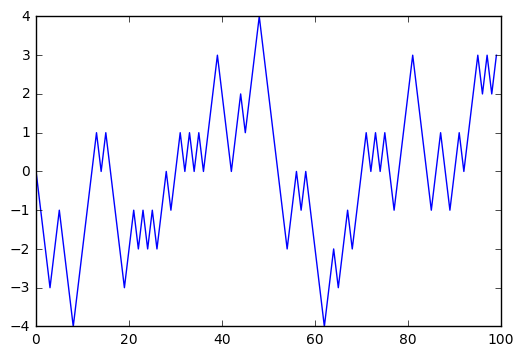

In [3]:
plt.plot(walk[:100])

随机漫步其实就是一个简单的累加。而用np.random能更快：

In [7]:
import numpy as np

In [9]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)

In [10]:
walk = steps.cumsum()

我们能直接从中得到一些统计数据，比如最大值和最小值：

In [11]:
walk.min()

-57

In [12]:
walk.max()

7

一个更复杂的统计值是在哪一步random walk到达了一个指定值。我们想知道从0走出10步用了多久，不论是正方向还是负方向。`np.abs(walk) >= 10`给我们一个布尔数组告诉我们是否超过10，但我们想要第一次出现的10或-10。因此，我们利用argmax来计算，这个会返回布尔数组中最大值的索引(Ture是最大值)：

In [13]:
(np.abs(walk) >= 10).argmax()

71

注意，使用argmax并不总是效率的，因为它总会搜索整个数组。在这里例子里，一旦True被找到了，我们就返回为最大值。

# Simulating Many Random Walks at Once（一次模拟多个随机漫步）

假设我们一次要模拟5000个随机漫步。传入一个2-tuple，np.random会生成一个二维数组，然后我们沿着每行来计算累加，这样就能一次模拟5000个：

In [14]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

In [15]:
walks

array([[ -1,  -2,  -3, ..., -24, -25, -26],
       [ -1,  -2,  -1, ..., -10,  -9,  -8],
       [  1,   0,   1, ...,  -4,  -3,  -4],
       ..., 
       [  1,   0,   1, ...,  52,  51,  52],
       [ -1,   0,   1, ..., -26, -25, -26],
       [ -1,   0,  -1, ..., -30, -29, -30]])

找到所有漫步中的最大值和最小值：

In [16]:
walks.max()

115

In [17]:
walks.min()

-129

在这些漫步模拟中，我们想找到30步以上的。用any方法：

In [18]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

In [19]:
hits30.sum()

3423

上面的step只是像翻硬币一样二选一，我们也可以用一个概率函数来生成：

In [20]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))